In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
from config import weather_api_key
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

url="http://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+weather_api_key

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [10]:
city_url

'http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=421a1ea675f8653e2a7e3b6652490ae7&q=svetlaya'

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")#" this is the URL {city_url}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except Exception as inst:
        print("City not found. Skipping..." + str(inst))
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | tambul
City not found. Skipping...'coord'
Processing Record 2 of Set 13 | kaitangata
Processing Record 3 of Set 13 | east london
Processing Record 4 of Set 13 | thilogne
City not found. Skipping...'coord'
Processing Record 5 of Set 13 | rikitea
Processing Record 6 of Set 13 | cabo san lucas
Processing Record 7 of Set 13 | faanui
Processing Record 8 of Set 13 | castro
Processing Record 9 of Set 13 | broome
Processing Record 10 of Set 13 | port alfred
Processing Record 11 of Set 13 | airai
Processing Record 12 of Set 13 | punta arenas
Processing Record 13 of Set 13 | vadso
Processing Record 14 of Set 13 | bathsheba
Processing Record 15 of Set 13 | sarkand
Processing Record 16 of Set 13 | muravlenko
Processing Record 17 of Set 13 | mahebourg
Processing Record 18 of Set 13 | tuktoyaktuk
Processing Record 19 of Set 13 | hithadhoo
Processing Record 20 of Set 13 | mar del plata
Processing Record 21 of Set 13 | kodiak
Processing Record 22 of Set 13 | qaanaaq
Pro

City not found. Skipping...'coord'
Processing Record 31 of Set 16 | yilan
Processing Record 32 of Set 16 | brigantine
Processing Record 33 of Set 16 | la paz
Processing Record 34 of Set 16 | sedelnikovo
City not found. Skipping...'coord'
Processing Record 35 of Set 16 | marzuq
Processing Record 36 of Set 16 | obzor
Processing Record 37 of Set 16 | tessalit
Processing Record 38 of Set 16 | husavik
Processing Record 39 of Set 16 | ponta do sol
Processing Record 40 of Set 16 | hilton head island
Processing Record 41 of Set 16 | manzhouli
Processing Record 42 of Set 16 | thiers
Processing Record 43 of Set 16 | elmina
Processing Record 44 of Set 16 | tabou
Processing Record 45 of Set 16 | namibe
Processing Record 46 of Set 16 | sibu
Processing Record 47 of Set 16 | zhezkazgan
Processing Record 48 of Set 16 | mys shmidta
City not found. Skipping...'coord'
Processing Record 49 of Set 16 | poum
Processing Record 50 of Set 16 | henties bay
Processing Record 1 of Set 17 | ketchikan
Processing Re

Processing Record 15 of Set 20 | narsaq
Processing Record 16 of Set 20 | raton
Processing Record 17 of Set 20 | alofi
Processing Record 18 of Set 20 | kisanga
Processing Record 19 of Set 20 | antofagasta
Processing Record 20 of Set 20 | tapaua
City not found. Skipping...'coord'
Processing Record 21 of Set 20 | ankazoabo
Processing Record 22 of Set 20 | amderma
City not found. Skipping...'coord'
Processing Record 23 of Set 20 | egvekinot
Processing Record 24 of Set 20 | santa fe
Processing Record 25 of Set 20 | cortez
Processing Record 26 of Set 20 | lompoc
Processing Record 27 of Set 20 | yerbogachen
Processing Record 28 of Set 20 | pacocha
Processing Record 29 of Set 20 | orissaare
Processing Record 30 of Set 20 | norman wells
Processing Record 31 of Set 20 | oga
Processing Record 32 of Set 20 | pipirig
Processing Record 33 of Set 20 | tevriz
Processing Record 34 of Set 20 | leh
Processing Record 35 of Set 20 | mayumba
Processing Record 36 of Set 20 | liku
Processing Record 37 of Set 

Processing Record 1 of Set 24 | san rafael
Processing Record 2 of Set 24 | fare
Processing Record 3 of Set 24 | kabalo
Processing Record 4 of Set 24 | nicoya
Processing Record 5 of Set 24 | altamira
Processing Record 6 of Set 24 | louisbourg
City not found. Skipping...'coord'
Processing Record 7 of Set 24 | karaul
City not found. Skipping...'coord'
Processing Record 8 of Set 24 | cockburn town
Processing Record 9 of Set 24 | kutum
Processing Record 10 of Set 24 | kahului
Processing Record 11 of Set 24 | changping
Processing Record 12 of Set 24 | kermanshah
Processing Record 13 of Set 24 | buarcos
Processing Record 14 of Set 24 | murgab
Processing Record 15 of Set 24 | deming
Processing Record 16 of Set 24 | mantua
Processing Record 17 of Set 24 | salinopolis
Processing Record 18 of Set 24 | bilma
Processing Record 19 of Set 24 | krasnyy profintern
Processing Record 20 of Set 24 | pathein
Processing Record 21 of Set 24 | acapulco
Processing Record 22 of Set 24 | addanki
Processing Recor

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,49.93,72,89,5.03,NZ,2021-07-27 18:06:45
1,East London,-33.0153,27.9116,73.89,30,0,8.68,ZA,2021-07-27 18:06:10
2,Rikitea,-23.1203,-134.9692,74.28,77,97,14.72,PF,2021-07-27 18:04:05
3,Cabo San Lucas,22.8909,-109.9124,95.81,68,1,8.01,MX,2021-07-27 18:06:46
4,Faanui,-16.4833,-151.7500,77.90,74,47,9.28,PF,2021-07-27 18:06:46
5,Castro,-24.7911,-50.0119,62.58,74,75,8.25,BR,2021-07-27 18:04:17
6,Broome,42.2506,-75.8330,88.02,49,1,1.99,US,2021-07-27 18:06:46
7,Port Alfred,-33.5906,26.8910,72.97,27,0,21.54,ZA,2021-07-27 18:06:47
8,Airai,-8.9266,125.4092,56.91,74,36,2.53,TL,2021-07-27 18:06:47
9,Punta Arenas,-53.1500,-70.9167,42.12,93,100,7.99,CL,2021-07-27 18:02:29


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

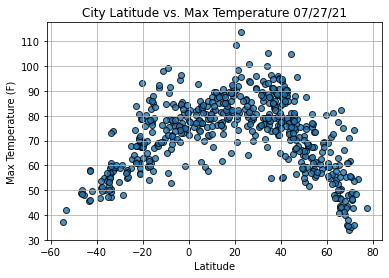

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

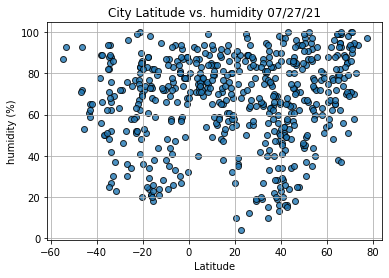

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. humidity "+ time.strftime("%x"))
plt.ylabel("humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
plt.show()

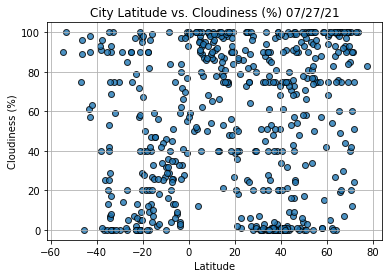

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

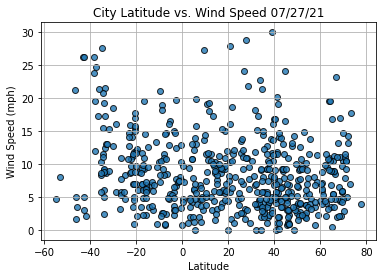

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

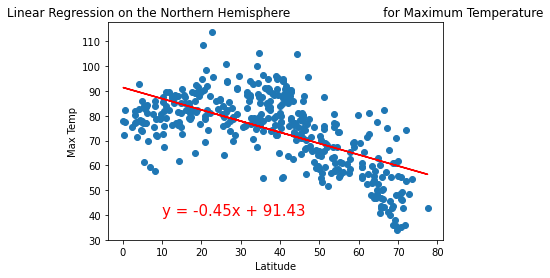

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))


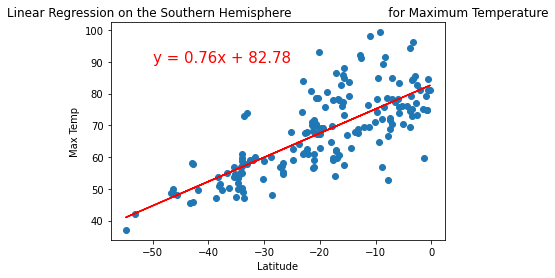

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


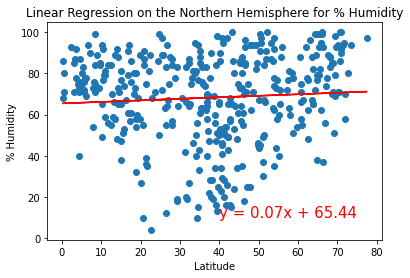

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

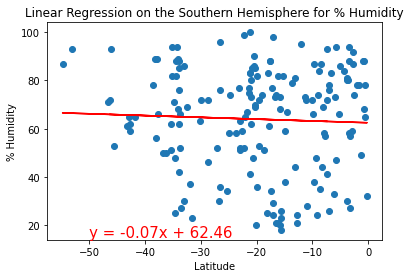

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,15))

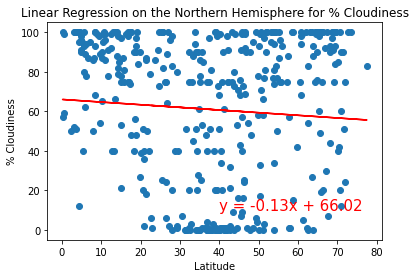

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(40,10))

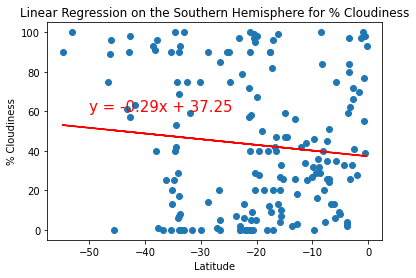

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       '% Cloudiness',(-50,60))

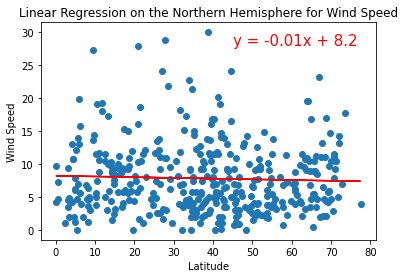

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(45,28))

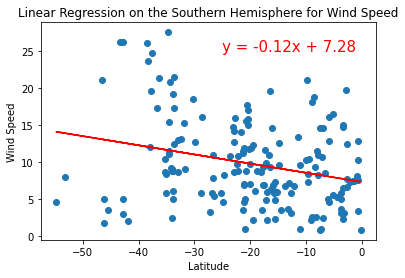

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-25,25))